# Fourth Step of Data Preparation Process

In this notebook file a perfectly balanced sample in terms of both quality and quantity will be selected from the dataset.

The images in the selected data will be read with the opencv library and the related faces will be resized as (224, 224) and added to the DataFrame.

Selected DataFrame will be splitted as Training Validation and Test data.

Face samples will be drawn.

All dataframes will be saved as pkl files for future use.

See http://mmlab.ie.cuhk.edu.hk/projects/socialrelation/index.html for dataset.

Images must be moved to /Data/RawData/Images/ path.

label.lst must be moved to /Data/RawData/Label/ path.

In [1]:
#Libraries are being imported
import numpy as np
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('cv2 Version: ' + cv2.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
cv2 Version: 4.5.1
pandas Version: 1.4.3
matplotlib Version: 3.5.2


In [3]:
#Function to draw Image
def DrawImage(imgDf : pd.DataFrame, labelDf : pd.DataFrame) -> None:
    plt.figure(figsize=(10,10))
    
    for i in range(imgDf.shape[0]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #matplotlib works in RGB color space by default
        #since the images are kept in BGR color space due to the use of opencv in this project
        #color conversion is required to draw a picture
        plt.imshow(cv2.cvtColor(imgDf.iloc[i].ImageBGR, cv2.COLOR_BGR2RGB))
        
        plt.xlabel(labelDf.iloc[imgDf.iloc[i].Label].Name)
        
    plt.show()
    
    return

In [4]:
#Function to Read Images BGR Format
def ReadImage(row : dict):
    img = cv2.imread('../Data/RawData/Image/' + row['ImageName'])
    if img is not None:
        return cv2.resize(img[row['FaceBoxTop'] : row['FaceBoxBottom'], row['FaceBoxLeft'] : row['FaceBoxRight']], (224, 224))
    return None

In [5]:
#Function to Draw Chart
def DrawChart(forChart : pd.DataFrame, labelDf : pd.DataFrame):
    #The distribution of people is being plotted according to the number of images belong to them
    plt.stem(labelDf.Name, forChart.values)
    del forChart
    plt.title('Number Of Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Number Of Image')
    plt.show()

In [6]:
#The data headers in the label.lst file are being defined according to the readme.txt file
dataLabel = ['ImageName', 'FaceID', 'FaceBoxTop', 'FaceBoxLeft', 'FaceBoxRight', 'FaceBoxBottom',
             'FaceBoxConfidence', 'Label']
dataLabel

['ImageName',
 'FaceID',
 'FaceBoxTop',
 'FaceBoxLeft',
 'FaceBoxRight',
 'FaceBoxBottom',
 'FaceBoxConfidence',
 'Label']

In [7]:
#The labels in the label.lst file are being defined in order according to the readme.txt file
labelDf = pd.read_json('../Data/RawData/Label/Label.json')
labelDf

,Name
0,Angry
1,Disgust
2,Fear
3,Happy
4,Sad
5,Surprise
6,Neutral


In [8]:
#label.lst file is being read as DataFrame
imageListDf = pd.read_csv('../Data/RawData/Label/label.lst', sep = ' ', header = None, names = dataLabel)
imageListDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [9]:
#sampleDf is being generated with rows with FaceBoxConfidence greater than 70
#This will balance the dataset to a certain level of quality
sampleDf = imageListDf[imageListDf['FaceBoxConfidence'] > 70.0].copy()
sampleDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
5,angry_actor_137.jpg,0,93,468,842,467,88.9519,0
9,angry_actor_150.jpg,0,56,263,376,169,81.8792,0
12,angry_actor_161.jpg,0,95,127,510,478,81.7953,6
...,...,...,...,...,...,...,...,...
91783,afraid_woman_204.jpg,0,20,13,93,100,74.5950,6
91787,expressionless_husband_673.jpg,0,48,194,388,242,82.2975,4
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5


In [10]:
#The number of representatives of the label represented by the least number of images is being calculated
minCount = sampleDf.groupby(['Label']).size().min()
minCount

247

In [11]:
#sampleDf is being generated with grouping the data by Label 
#and selecting minCount rows with the low FaceBoxConfidence value of each group

#With this process, all the representatives of the label represented by the least number of images are selected,
#while the ones with the lowest quality from the other labels are being selected

#This will cause labels with more representatives to be represented with worse images in terms of quality
#This dataset will not be perfectly balanced in terms of quality, even as it is written in the notebook title
#However, this should not be a problem as the quality of images of any label will be above a certain level

#Also this sample contains too few data although it is balanced and this can be cause a bigger problem
sampleDf = sampleDf.sort_values(by=['FaceBoxConfidence'], ascending = True).groupby('Label').head(minCount)
sampleDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label
84007,amazed_man_537.jpg,0,229,419,648,458,70.0002,6
79605,awe_couple_239.jpg,0,160,601,697,256,70.0002,6
28338,crying_man_211.jpg,0,88,200,466,354,70.0053,4
88167,awe_girl_40.jpg,0,33,236,371,168,70.0069,6
40306,distressed_expression_222.jpg,0,27,351,513,189,70.0070,0
...,...,...,...,...,...,...,...,...
11447,hostile_boss_206.jpg,0,275,1425,1976,826,108.0620,2
72839,surprised_expression_231.jpg,0,38,307,537,268,108.7550,2
47576,ecstatic_woman_2.jpg,0,568,522,794,840,109.6470,2
27128,expressionless_father_914.jpg,3,194,582,662,274,122.5950,2


In [12]:
#imageListDf is being cleaned
del imageListDf

In [13]:
#The number of data for each label is being calculated by grouping the sampleDf by to the label
forChart = pd.DataFrame(sampleDf.groupby(['Label']).size(), columns = ['Size'])
forChart

,Size
Label,
0,247
1,247
2,247
3,247
4,247
5,247
6,247


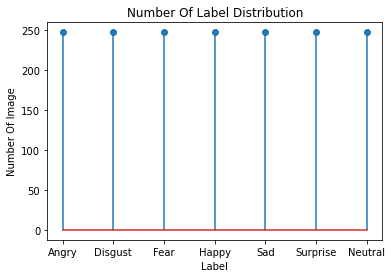

In [14]:
#For sampleDf, the distribution of labels is being plotted
#In the plotted graph it can be seen that sampleDf is perfectly balanced in terms of quantity
DrawChart(forChart, labelDf)

In [15]:
#The face boxes in sampleDf are being read from raw images
sampleDf['ImageBGR'] = sampleDf.apply(lambda row: ReadImage(row), axis=1)
sampleDf

,ImageName,FaceID,FaceBoxTop,FaceBoxLeft,FaceBoxRight,FaceBoxBottom,FaceBoxConfidence,Label,ImageBGR
84007,amazed_man_537.jpg,0,229,419,648,458,70.0002,6,"[[[6, 9, 168], [1, 8, 165], [0, 10, 164], [0, ..."
79605,awe_couple_239.jpg,0,160,601,697,256,70.0002,6,"[[[71, 68, 83], [71, 69, 84], [74, 71, 86], [7..."
28338,crying_man_211.jpg,0,88,200,466,354,70.0053,4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
88167,awe_girl_40.jpg,0,33,236,371,168,70.0069,6,"[[[65, 66, 80], [64, 65, 79], [63, 64, 78], [6..."
40306,distressed_expression_222.jpg,0,27,351,513,189,70.0070,0,"[[[44, 42, 42], [44, 42, 42], [44, 42, 42], [4..."
...,...,...,...,...,...,...,...,...,...
11447,hostile_boss_206.jpg,0,275,1425,1976,826,108.0620,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
72839,surprised_expression_231.jpg,0,38,307,537,268,108.7550,2,"[[[1, 0, 5], [2, 0, 6], [3, 2, 6], [3, 2, 6], ..."
47576,ecstatic_woman_2.jpg,0,568,522,794,840,109.6470,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
27128,expressionless_father_914.jpg,3,194,582,662,274,122.5950,2,"[[[221, 228, 215], [221, 228, 215], [221, 228,..."


In [16]:
#Unnecessary fields are being removed from sampleDf
sampleDf.drop(['ImageName', 'FaceID','FaceBoxTop', 'FaceBoxLeft',
               'FaceBoxRight', 'FaceBoxBottom', 'FaceBoxConfidence'], axis = 1, inplace = True)
sampleDf

,Label,ImageBGR
84007,6,"[[[6, 9, 168], [1, 8, 165], [0, 10, 164], [0, ..."
79605,6,"[[[71, 68, 83], [71, 69, 84], [74, 71, 86], [7..."
28338,4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
88167,6,"[[[65, 66, 80], [64, 65, 79], [63, 64, 78], [6..."
40306,0,"[[[44, 42, 42], [44, 42, 42], [44, 42, 42], [4..."
...,...,...
11447,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
72839,2,"[[[1, 0, 5], [2, 0, 6], [3, 2, 6], [3, 2, 6], ..."
47576,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
27128,2,"[[[221, 228, 215], [221, 228, 215], [221, 228,..."


In [17]:
#sampleDf is being checked for null
sampleDf.isnull().any()

Label       False
ImageBGR    False
dtype: bool

In [18]:
#Training data is being splitted from sampleDf
trainingDf = sampleDf.sample(frac=0.75)
testDf = sampleDf.drop(trainingDf.index)
trainingDf.reset_index(drop = True, inplace = True)
trainingDf

,Label,ImageBGR
0,3,"[[[65, 63, 55], [65, 63, 55], [65, 63, 55], [6..."
1,0,"[[[255, 255, 254], [254, 254, 253], [252, 251,..."
2,1,"[[[199, 201, 201], [202, 204, 204], [200, 202,..."
3,0,"[[[200, 218, 235], [200, 218, 235], [201, 219,..."
4,0,"[[[224, 212, 200], [216, 206, 195], [204, 197,..."
...,...,...
1292,6,"[[[253, 253, 253], [253, 253, 253], [253, 253,..."
1293,5,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1294,6,"[[[23, 39, 46], [27, 45, 52], [29, 48, 56], [3..."
1295,0,"[[[31, 33, 41], [29, 31, 39], [25, 27, 35], [2..."


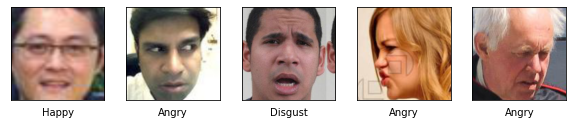

In [19]:
#First 5 images of trainingDf are being drawn
DrawImage(trainingDf.head(), labelDf)

In [20]:
#Validation and Test Data is being generated
validationDf = testDf.sample(frac=0.5)
testDf = testDf.drop(validationDf.index)
validationDf.reset_index(drop = True, inplace = True)
validationDf

,Label,ImageBGR
0,2,"[[[253, 249, 248], [253, 249, 248], [253, 249,..."
1,5,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,2,"[[[233, 231, 231], [233, 231, 231], [233, 231,..."
3,4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,6,"[[[124, 207, 209], [124, 207, 209], [123, 207,..."
...,...,...
211,1,"[[[223, 223, 223], [224, 224, 224], [224, 224,..."
212,4,"[[[138, 143, 144], [138, 143, 144], [137, 143,..."
213,1,"[[[163, 152, 100], [163, 152, 100], [161, 151,..."
214,2,"[[[209, 225, 238], [209, 225, 238], [209, 225,..."


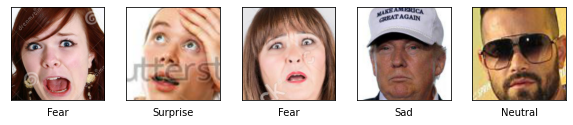

In [21]:
#First 5 images of validationDf are being drawn
DrawImage(validationDf.head(), labelDf)

In [22]:
#indexes of testDf are being resetted
testDf.reset_index(drop = True, inplace = True)
testDf

,Label,ImageBGR
0,3,"[[[101, 104, 102], [101, 104, 102], [101, 104,..."
1,6,"[[[61, 84, 106], [61, 84, 106], [62, 86, 109],..."
2,6,"[[[56, 54, 54], [63, 61, 61], [72, 69, 69], [7..."
3,6,"[[[18, 23, 21], [18, 23, 21], [17, 22, 20], [1..."
4,3,"[[[18, 19, 17], [18, 19, 17], [18, 19, 17], [1..."
...,...,...
211,2,"[[[1, 11, 26], [14, 23, 34], [31, 38, 47], [42..."
212,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
213,2,"[[[164, 170, 169], [164, 170, 169], [164, 170,..."
214,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


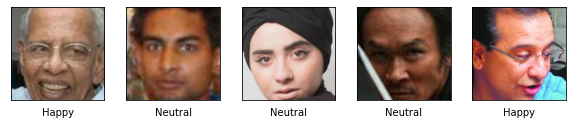

In [23]:
#First 5 images of testDf are being drawn
DrawImage(testDf.head(), labelDf)

In [24]:
#The selected data is being saved as pkl files with the name Sample3 for future use
trainingDf.to_pickle("../Data/Sample3/Training.pkl")
validationDf.to_pickle("../Data/Sample3/Validation.pkl")
testDf.to_pickle("../Data/Sample3/Test.pkl")